In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import glob

# 1. 카드데이터 (08/09기준 업데이트)

In [2]:
df_card = pd.read_csv("CARD_SPENDING_190809.txt",sep='\t') 
#빅콘측에서 8월9일 카드데이터 업데이트함

df_card.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,110,515,21,F,30,4,180
1,20180401,110,515,21,F,55,4,22
2,20180401,110,515,21,M,20,35,184
3,20180401,110,515,21,M,25,70,425
4,20180401,110,515,21,M,30,18,82


In [ ]:
#df_card.isnull().any() 
#각 변수별로 결측값은 존재하지 않음
#np.trunc(df_card.describe())

In [3]:
#df_card[(df_card['DONG_CD'] == 550) & (df_card['GU_CD'] != 110)]
#구,동 결합한 파생변수 생성
df_card.loc[:, 'GU_DONG_CD'] = 1000 * df_card.loc[:, 'GU_CD'] + df_card.loc[:, 'DONG_CD']
df_card.iloc[2:11, 0:11]

#GU_CD 변환
df_card.loc[df_card['GU_CD'] == 110,'GU_CD'] = ['종로구']
df_card.loc[df_card['GU_CD'] == 350,'GU_CD'] =['노원구'] 
df_card['GU_CD'].value_counts()
df_card.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,GU_DONG_CD
0,20180401,종로구,515,21,F,30,4,180,110515
1,20180401,종로구,515,21,F,55,4,22,110515
2,20180401,종로구,515,21,M,20,35,184,110515
3,20180401,종로구,515,21,M,25,70,425,110515
4,20180401,종로구,515,21,M,30,18,82,110515


In [4]:
#DONG_CD 변환
df_card['GUDONG_CD']=df_card['GU_DONG_CD'].astype("category")
df_card['GUDONG_CD'].cat.categories
df_card['GUDONG_CD'].cat.categories=['청운효자동','사직동','삼청동','부암동','평창동',
                                     '무악동','교남동','가회동','종로1,2,3,4가동','종로5,6가동',
                                     '이화동','혜화동', '창신1동', '창신2동', '창신3동','숭인1동',
                                     '숭인2동','월계1동','월계2동', '월계3동', '공릉1동', '공릉2동',
                                     '하계1동','하계2동','중계본동','중계1동','중계4동','중계2,3동',
                                     '상계1동', '상계2동', '상계3,4동', '상계5동', '상계6,7동', '상계8동',
                                     '상계9동', '상계10동']

df_card['TYPE']=df_card['MCT_CAT_CD'].astype("category")
df_card['TYPE'].cat.categories
df_card['TYPE'].cat.categories=["숙박","레저용품","레저업소","문화취미","가구","전기","주방용구","연료판매",
                         "광학제품","가전","유통업","의복","직물","신변잡화","서적문구","사무통신","자동차판매",
                         "자동차정비","의료기관","보건위생","요식업소","음료식품","수리서비스"]



In [5]:
# 필요한 변수만 남기기
df_card= df_card[['STD_DD','GU_CD','GUDONG_CD','SEX_CD','AGE_CD','TYPE','USE_CNT','USE_AMT']]
# 이름을 편하게
df_card = df_card.rename(columns = {'STD_DD': 'STD_YMD'})
df_card.head()

,STD_YMD,GU_CD,GUDONG_CD,SEX_CD,AGE_CD,TYPE,USE_CNT,USE_AMT
0,20180401,종로구,청운효자동,F,30,레저업소,4,180
1,20180401,종로구,청운효자동,F,55,레저업소,4,22
2,20180401,종로구,청운효자동,M,20,레저업소,35,184
3,20180401,종로구,청운효자동,M,25,레저업소,70,425
4,20180401,종로구,청운효자동,M,30,레저업소,18,82


## 1.1 일별 카드 매출

In [ ]:
#일별 카드 데이터
amt_sum = df_card["USE_AMT"].groupby(df_card["STD_YMD"]).sum() # 일별 이용금액 총합
cnt_sum = df_card["USE_CNT"].groupby(df_card["STD_YMD"]).sum() # 일별 이용건수의 총합
amt_mean = df_card["USE_AMT"].groupby(df_card["STD_YMD"]).sum()/df_card["USE_CNT"].groupby(df_card["STD_YMD"]).sum()

card_day = pd.concat([amt_sum,cnt_sum,amt_mean],axis=1,
                    keys=['amt_sum','cnt_sum','amt_mean'])
card_day.head()

,amt_sum,cnt_sum,amt_mean
STD_YMD,,,
20180401,12207618,578056,21.118400
20180402,13853900,683966,20.255247
20180403,13918070,684400,20.336163
20180404,14371889,699622,20.542363
20180405,12668002,620428,20.418166


In [ ]:
card_day.to_csv('card_day.csv')
card_day = pd.read_csv('card_day.csv',index_col='STD_YMD',parse_dates=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1bb20160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bb55ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1bb55240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bb645c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bb64908>],
 'means': []}

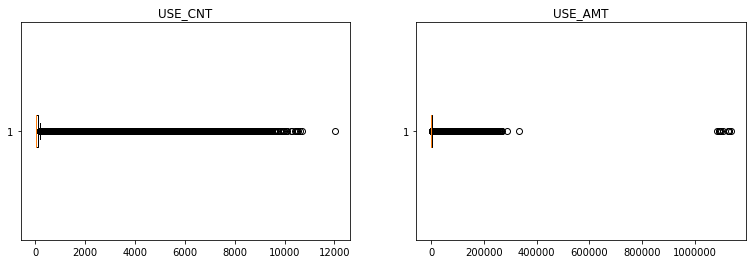

In [ ]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('USE_CNT')
ax1.boxplot(df_card['USE_CNT'],vert=False)
ax2.set_title('USE_AMT')
ax2.boxplot(df_card['USE_AMT'],vert=False)
#이용금액과 이용건은 둘다 left-skewed. 각각 median이 47만 9천원과 23건이지만, 상위 25%에서 차이가 가장큼. 

In [ ]:
#가장 큰 소비금액 52억원은 2018년 6월 15일 50~59세 남성 샘플인구가 '종로구 종로1.2.3.4가동 (110615)'의 '의료기관(70)'에서 489건 소비함
df_card.ix[df_card['USE_AMT'].idxmax()]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


STD_YMD      20190318
GU_CD             노원구
GUDONG_CD        중계본동
SEX_CD              M
AGE_CD             50
TYPE             의료기관
USE_CNT           123
USE_AMT       1138252
Name: 2074129, dtype: object

In [ ]:
df_card.iloc[418962:418982,0:10] #최대 소비금액을 (418972)을 기준으로 20개 케이스를 봄. 특별하게 더 많은 소비가 보이진 않음.

,STD_YMD,GU_CD,GUDONG_CD,SEX_CD,AGE_CD,TYPE,USE_CNT,USE_AMT
418962,20180609,노원구,중계4동,M,30,문화취미,4,130
418963,20180609,노원구,중계4동,M,40,문화취미,13,191
418964,20180609,노원구,중계4동,M,45,문화취미,4,43
418965,20180609,노원구,중계4동,M,60,문화취미,4,173
418966,20180609,노원구,중계4동,F,25,가전,4,515
418967,20180609,노원구,중계4동,F,45,가전,4,195
418968,20180609,노원구,중계4동,M,45,가전,13,7833
418969,20180609,노원구,중계4동,M,50,가전,4,515
418970,20180609,노원구,중계4동,F,20,유통업,139,705
418971,20180609,노원구,중계4동,F,25,유통업,87,430


In [ ]:
df_card.nlargest(50, ['USE_AMT']) 

,STD_YMD,GU_CD,GUDONG_CD,SEX_CD,AGE_CD,TYPE,USE_CNT,USE_AMT
2074129,20190318,노원구,중계본동,M,50,의료기관,123,1138252
1918965,20190220,노원구,중계본동,M,50,의료기관,72,1131479
1754303,20190122,노원구,중계본동,M,50,의료기관,121,1129109
1550574,20181218,노원구,중계본동,M,50,의료기관,135,1126231
1212955,20181022,노원구,중계본동,M,50,의료기관,71,1108389
1007957,20180917,노원구,중계본동,M,50,의료기관,88,1098636
691093,20180725,노원구,중계본동,M,50,의료기관,70,1095046
1391072,20181121,노원구,중계본동,M,50,의료기관,66,1092718
848642,20180821,노원구,중계본동,M,50,의료기관,70,1092105
321636,20180524,노원구,중계본동,M,50,의료기관,57,1090946


In [ ]:
df_card[df_card["USE_AMT"]>=1095046] 

,STD_YMD,GU_CD,GUDONG_CD,SEX_CD,AGE_CD,TYPE,USE_CNT,USE_AMT
691093,20180725,노원구,중계본동,M,50,의료기관,70,1095046
1007957,20180917,노원구,중계본동,M,50,의료기관,88,1098636
1212955,20181022,노원구,중계본동,M,50,의료기관,71,1108389
1550574,20181218,노원구,중계본동,M,50,의료기관,135,1126231
1754303,20190122,노원구,중계본동,M,50,의료기관,121,1129109
1918965,20190220,노원구,중계본동,M,50,의료기관,72,1131479
2074129,20190318,노원구,중계본동,M,50,의료기관,123,1138252


가장 큰 소비가 일어나는  50곳들은 지역별 특정 소비 패턴이 보임
- 종로구 종로1.2.3.4가동 (110 615) 의료기관(70) =>"서울대학교 병원" 추정
- 노원구 상계6.7동 (350 695), 중계본동(350 619) 주유소, LPG가스와 같은 연료판매(33) => 상계 6,7동 "SK엔크린 양지진흥상계주유소", 중계본동 "S-Oil 주유소"
- 주로 4,50대 소비자들
- 의료기관에서는 건당 평균 1억원 정도, 연료판매에서는 건당 평균 7만원 정도.

In [ ]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams["font.size"] = 11

In [ ]:
def bindo(df,wid):## char  데이터 빈도 분석, 그래프까지 반환
    dong = Counter(df)
    dong_cd = list(dong.keys())
    dong_va = list(dong.values())
    dong_df = pd.DataFrame()
    dong_df['cd'] = dong_cd
    dong_df['value'] = dong_va##장르 이름
    print("가장 큰 값 :\n",dong_df[dong_df['value']==dong_df['value'].max()])##가장 큰 값
    print("가장 작은 값 :\n",dong_df[dong_df['value']==dong_df['value'].min()])##가장 작은값
    plt.rcParams["font.size"] = 11
    plt.figure(figsize = (40,20))
    plt.bar(dong_cd, dong_va,width=wid)
    plt.xlabel('code', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    return 

#bindo(df_card['GU_CD'],3)
# 노원 종로 큰 차이가 없다.

가장 큰 값 :
             cd   value
8  종로1,2,3,4가동  122413
가장 작은 값 :
       cd  value
14  창신3동  25935


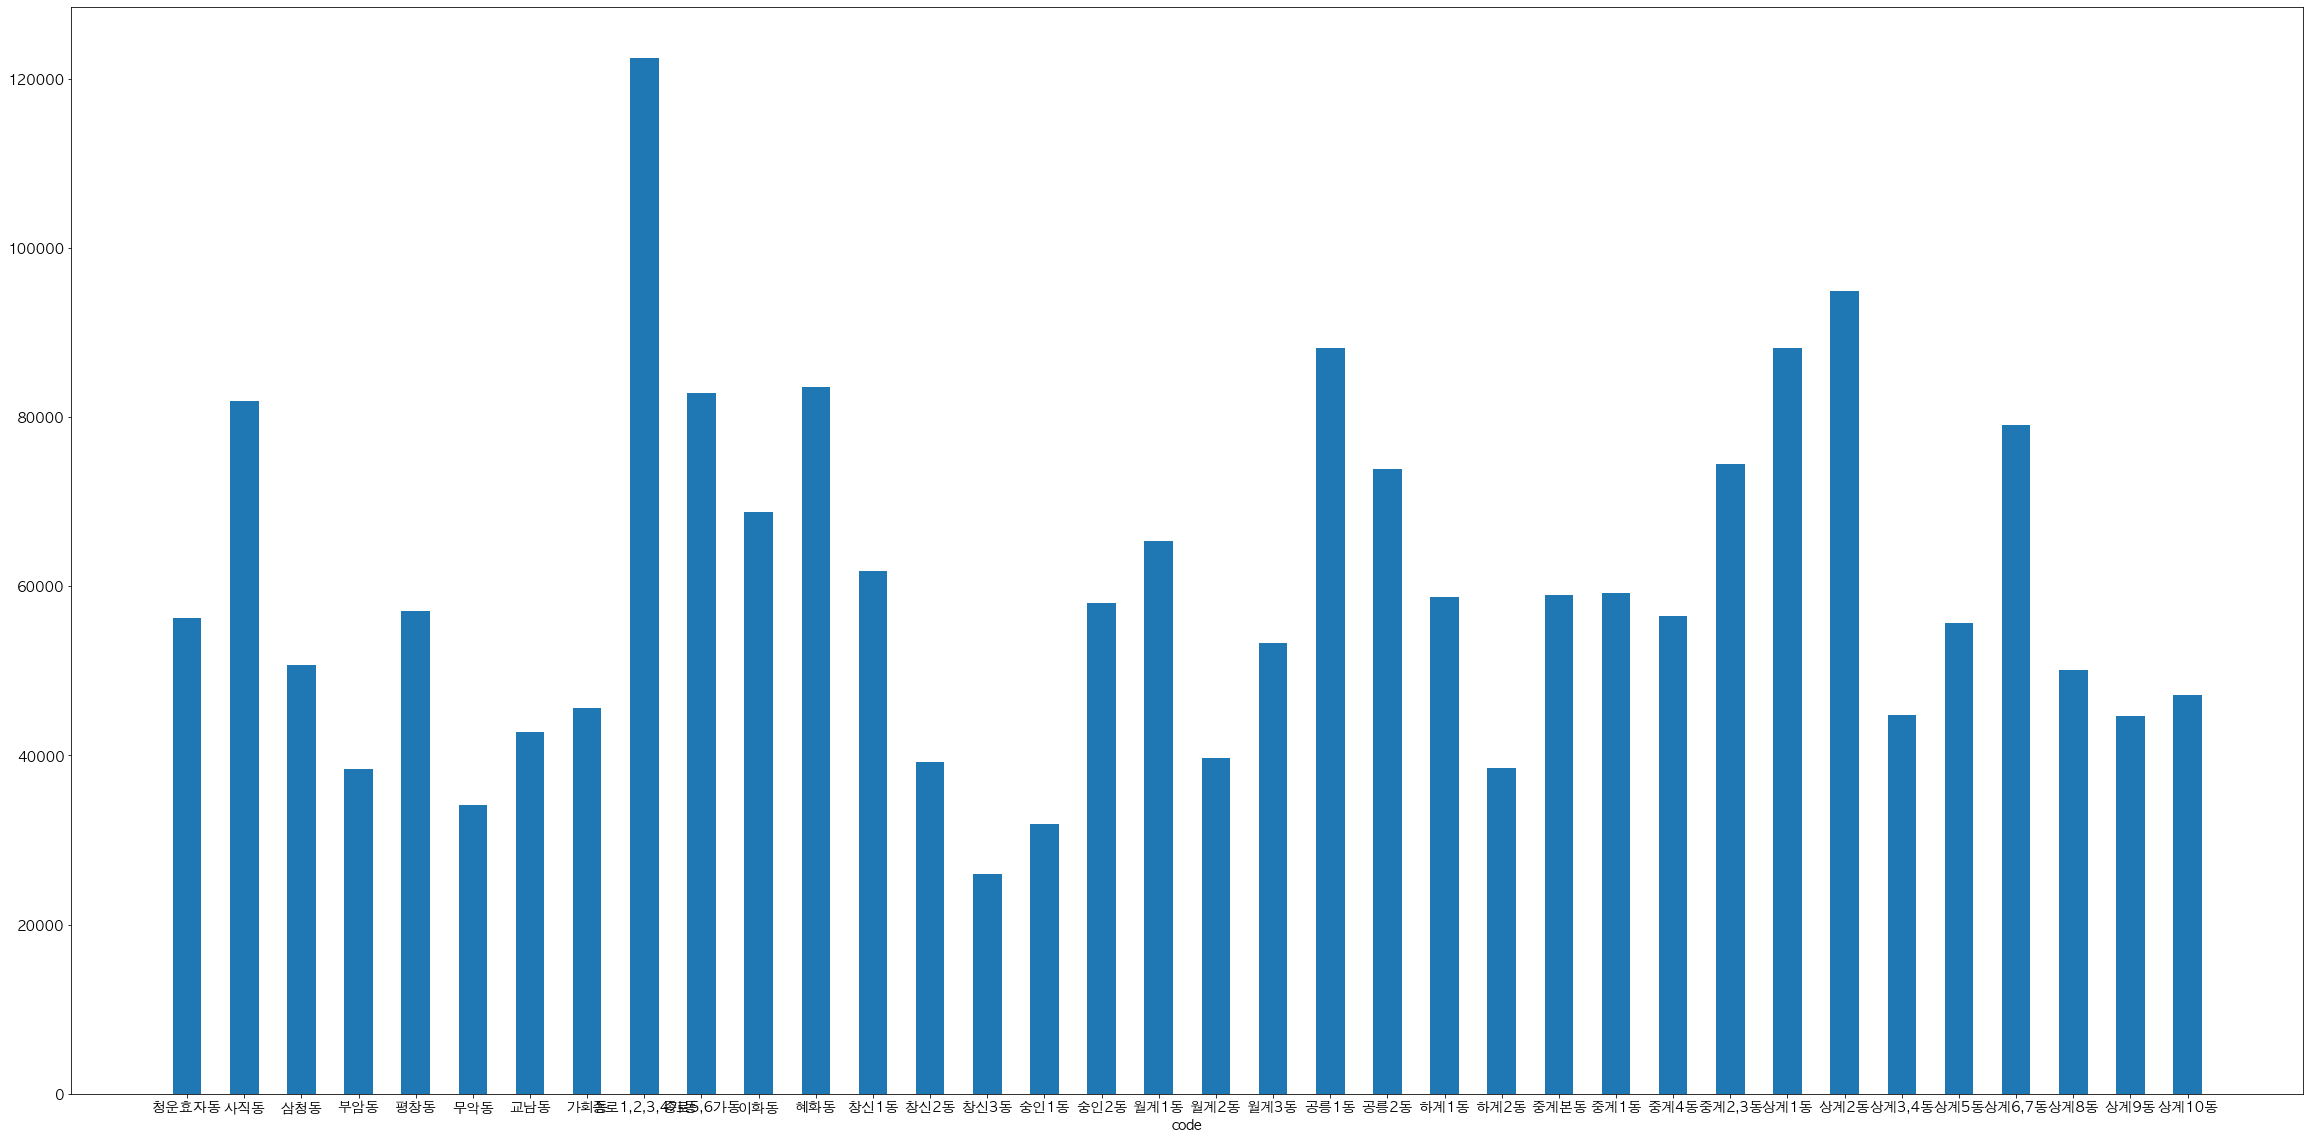

In [ ]:
bindo(df_card['GUDONG_CD'], .5) #빈도가 가장 많은 곳(종로1.2.3.4가동)과 가장 작은 곳(창신3동)의 차이는 약 4배 이상.

## 1.2 행정동별 카드 매출

In [6]:
df_card.head()

,STD_YMD,GU_CD,GUDONG_CD,SEX_CD,AGE_CD,TYPE,USE_CNT,USE_AMT
0,20180401,종로구,청운효자동,F,30,레저업소,4,180
1,20180401,종로구,청운효자동,F,55,레저업소,4,22
2,20180401,종로구,청운효자동,M,20,레저업소,35,184
3,20180401,종로구,청운효자동,M,25,레저업소,70,425
4,20180401,종로구,청운효자동,M,30,레저업소,18,82


In [9]:
df_cd= df_card.copy()

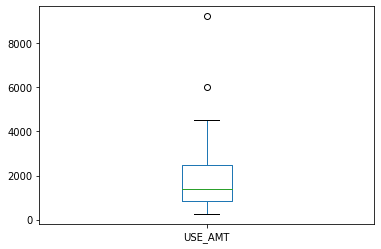

In [12]:
dong_amt= df_cd['USE_AMT'].groupby([df_card["GUDONG_CD"]]).mean()
dong_amt.plot("box")

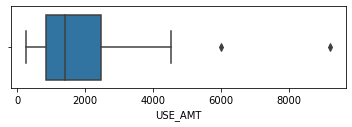

In [18]:
plt.figure(figsize = (6,1.5))
sns.boxplot(dong_amt)
plt.show()

In [23]:
dong_amt.values

array([ 946.58052175, 3097.71872977, 1197.84570821,  855.54576474,
       1635.2040409 , 1035.9534346 , 2429.14779455, 1093.92525864,
       9218.81792783, 2447.1874608 , 5997.07635819, 2551.69715824,
        932.29044576,  551.13392221,  256.71582803,  541.22258813,
        862.47982364, 1740.25438757,  621.12221578, 2595.56753712,
       2419.65572339, 2308.95565422, 3043.84493698,  535.79639383,
       1562.47615734, 1801.45466529, 1223.96122193, 3118.76074402,
       2312.58596169, 4538.41056855,  773.61798755,  723.38864354,
       3395.62614032,  748.95959475,  987.40654916,  331.4444633 ])

In [24]:
temp_x = dong_amt.index
temp_y = dong_amt.values

In [38]:
print("최소값:",temp_y.min(),"최대값: ",temp_y.max())

최소값: 256.7158280316175 최대값:  9218.817927834461


In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams["font.size"] = 10 ## 폰트 크기 결정

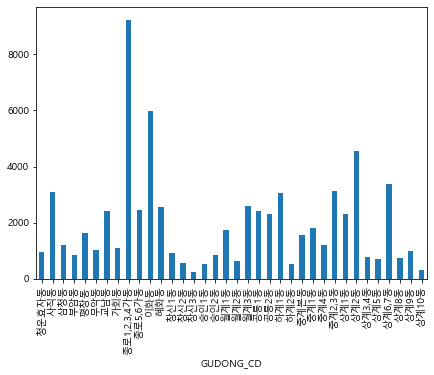

In [36]:
plt.figure(figsize = (7,5))
dong_amt.plot("bar")

### 연령 카드 매출

In [44]:
tmp_age = df_cd['USE_AMT'].groupby([df_card["AGE_CD"],df_card["SEX_CD"]]).mean()

In [49]:
tmp_sex = df_cd['USE_AMT'].groupby([df_card["SEX_CD"],df_card["AGE_CD"]]).mean()

In [57]:
tmp_sex = df_cd[['USE_AMT','AGE_CD']].groupby([df_card["SEX_CD"]]).mean()

In [58]:
tmp_sex 

,USE_AMT,AGE_CD
SEX_CD,,
F,2371.846257,41.835342
M,2485.968280,41.807150


In [55]:
 = pd.DataFrame(tmp_sex)

USE_AMT
SEX_CD AGE_CD             
F      20      2001.237145
       25      2494.002644
       30      2253.069904
       35      2445.540269
       40      2527.116094
       45      3080.007999
       50      2586.189434
       55      2257.078377
       60      1771.346241
       65      2008.502444
M      20      1513.860281
       25      2657.182196
       30      2352.628773
       35      2638.762489
       40      2573.845096
       45      3026.686347
       50      2741.323897
       55      2359.532299
       60      2016.607742
       65      2806.905156

In [46]:
tmp_age

AGE_CD  SEX_CD
20      F         2001.237145
        M         1513.860281
25      F         2494.002644
        M         2657.182196
30      F         2253.069904
        M         2352.628773
35      F         2445.540269
        M         2638.762489
40      F         2527.116094
        M         2573.845096
45      F         3080.007999
        M         3026.686347
50      F         2586.189434
        M         2741.323897
55      F         2257.078377
        M         2359.532299
60      F         1771.346241
        M         2016.607742
65      F         2008.502444
        M         2806.905156
Name: USE_AMT, dtype: float64

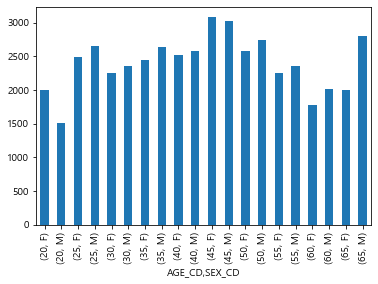

In [48]:
tmp_age.plot("bar")

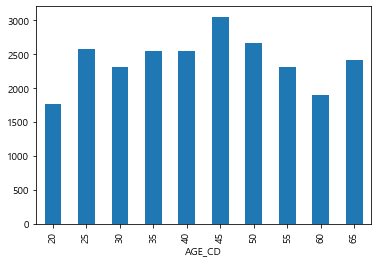

In [42]:
tmp_age.plot("bar")

### 업종별 카드 매출

Text(0.5, 0, '업종별 평균 카드 매출액')

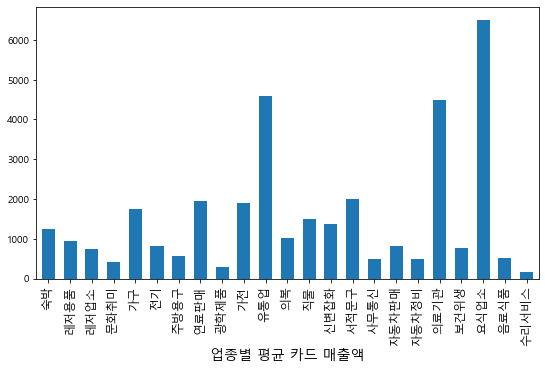

In [95]:
df_cdty = df_cd.rename(columns={'TYPE':'업종'})
tmp_ty = df_cdty['USE_AMT'].groupby([df_cdty["업종"]]).mean()

plt.figure(figsize=(9,5))
tmp_ty.plot("bar",width=0.6)
plt.xticks(fontsize = 12)
plt.xlabel("업종별 평균 카드 매출액",fontsize = 14)

In [101]:
print("최대매출 : ",tmp_ty.argmax(),tmp_ty.max())
print("최소매출 : ",tmp_ty.argmin(),tmp_ty.min())

최대매출 :  요식업소 6504.799804365338
최소매출 :  수리서비스 172.95778339706428


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


In [105]:
tmp_ty = df_cdty['USE_CNT'].groupby([df_cdty["업종"]]).sum()

In [106]:
print("최대매출건수 : ",tmp_ty.argmax(),tmp_ty.max())
print("최소매출 건수: ",tmp_ty.argmin(),tmp_ty.min())

최대매출건수 :  요식업소 89442576
최소매출 건수:  전기 14822


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Text(0.5, 0, '업종별 평균 카드 매출건수')

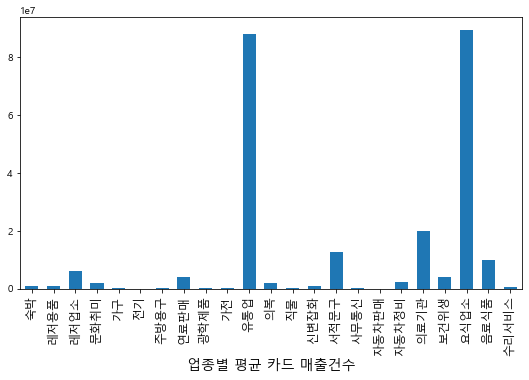

In [107]:
plt.figure(figsize=(9,5))
tmp_ty.plot("bar",width=0.6)
plt.xticks(fontsize = 12)
plt.xlabel("업종별 평균 카드 매출건수",fontsize = 14)

Text(0.5, 0, '업종별 평균 카드 매출액')

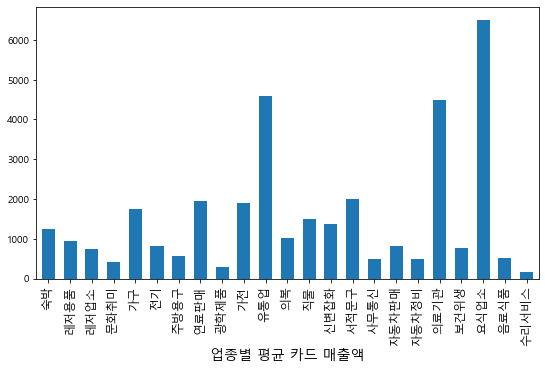

In [ ]:
tmp_ty = df_cd['USE_AMT'].groupby([df_card["TYPE"]]).mean()

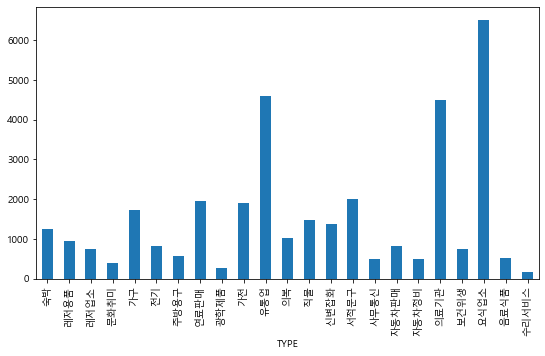

In [75]:
plt.figure(figsize=(9,5))
tmp_ty.plot("bar",width=0.5)